In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from taiesm import TaiESM
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [2]:
model = TaiESM("/work/aaron900129/taiesm_work/archive/B1850TAI_f09g16_cmip6_AER1980_Aaron_week8_course/atm/hist/B1850TAI_f09g16_cmip6_AER1980_Aaron_week8_course.cam.h0.0671-01.nc")
bc_a1_SRF = model.getVar("bc_a1_SRF")[0]
so4_a1_SRF = model.getVar("so4_a1_SRF")[0]

In [24]:
# draw filled contours.
clevs = np.arange(0, 11, 1)
# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

In [ ]:
## test
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(2, 1, figsize=(14, 10), dpi=100,
                       subplot_kw={'projection': proj},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.07},)

cf0 = ax[0].contourf(model.LON2, model.LAT2, bc_a1_SRF * 1e9, levels=np.arange(0, 11, 1), cmap=cmap, norm=norm)
cf1 = ax[1].contourf(model.LON2, model.LAT2, so4_a1_SRF * 1e9, levels=np.arange(0, 11, 1), cmap=cmap, norm=norm)

for i in range(2):
    ax[i].coastlines()
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.STATES)

plt.colorbar(cf0)
plt.colorbar(cf1)
plt.savefig("test.png")
plt.show()

In [36]:
ctl = TaiESM("/work/j07hsu00/taiesm_work/archive/f09.B-PI.tn15.cmip6.j01.re/atm/hist/f09.B-PI.tn15.cmip6.j01.re.cam.h0.0671-0700.mon.nc")
sw_ctl = np.nanmean(ctl.getVar("FSNT"), axis=0)
lw_ctl = np.nanmean(ctl.getVar("FLNT"), axis=0)
sw_clrsky_toa_ctl = np.nanmean(ctl.getVar("FSNTC"), axis=0)
Ts_ctl = np.nanmean(ctl.getVar("TS"), axis=0)

net_ctl = sw_ctl - lw_ctl

(360, 192, 288)


/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/aaron900129/miniconda/envs/Aaron/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


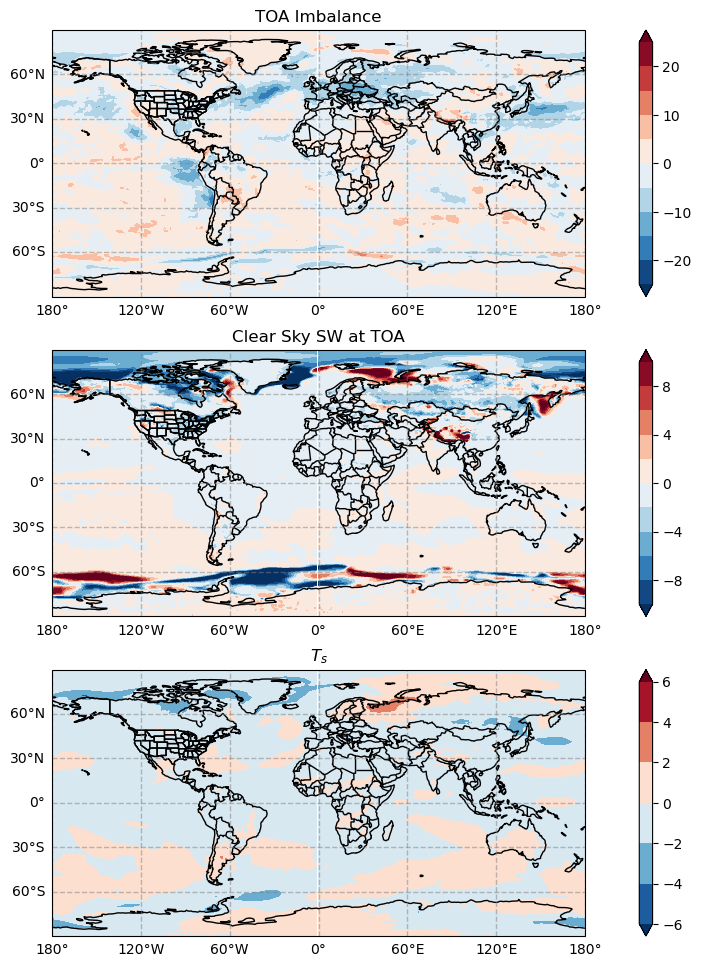

In [44]:
netW = 0
sw_clrsky_toa = 0
Ts = 0
for i in range(1, 13):
    name = str(i).zfill(2)
    hw = TaiESM(f"/work/aaron900129/taiesm_work/archive/B1850TAI_f09g16_cmip6_AER1980_Aaron_week8_hw/atm/hist/B1850TAI_f09g16_cmip6_AER1980_Aaron_week8_hw.cam.h0.0671-{name}.nc")
    # hw = TaiESM(f"/work/aaron900129/taiesm_work/archive/B_1850_TAI.f09_g16.week8.cmip6_AER1980_1y/atm/hist/B_1850_TAI.f09_g16.week8.cmip6_AER1980_1y.cam.h0.0671-{name}.nc")
    sw = hw.getVar("FSNT")[0]
    lw = hw.getVar("FLNT")[0]
    
    sw_clrsky_toa += hw.getVar("FSNTC")[0]
    Ts += hw.getVar("TS")[0]
    netW += sw - lw

netW /= 12
sw_clrsky_toa /= 12
Ts /= 12

proj = ccrs.PlateCarree()
fig, ax = plt.subplots(3, 1, figsize=(14, 12), dpi=100,
                       subplot_kw={'projection': proj},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.2},
          )

for i in range(3):
    ax[i].coastlines()
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.STATES)
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False


cf0 = ax[0].contourf(hw.LON2, hw.LAT2, netW - net_ctl, extend='both', levels=np.linspace(-25, 25, 11), cmap=cm.RdBu_r)
ax[0].set_title("TOA Imbalance")
plt.colorbar(cf0)

cf1 = ax[1].contourf(hw.LON2, hw.LAT2, sw_clrsky_toa - sw_clrsky_toa_ctl, extend='both', levels=np.linspace(-10, 10, 11), cmap=cm.RdBu_r)
ax[1].set_title("Clear Sky SW at TOA")
plt.colorbar(cf1)

cf2 = ax[2].contourf(hw.LON2, hw.LAT2, Ts - Ts_ctl, extend='both', levels=np.linspace(-6, 6, 7), cmap=cm.RdBu_r)
ax[2].set_title(r"$T_s$")
plt.colorbar(cf2)

plt.savefig("week8.png", dpi=300)
plt.show()

In [39]:
np.linspace(-6, 6, 7)

array([-6., -4., -2.,  0.,  2.,  4.,  6.])